In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import warnings
# filter some warning messages
warnings.filterwarnings("ignore") 
from geopy.distance import geodesic 

####################you will need to change some paths here!#####################
#list of input files
#list of input files

filename_aviso='F:/data/project_data/NASA_biophysical/aviso/eddy_trajectory_19930101_20170106.nc'   #From AVISO  website
filename_bird='f:/data/project_data/NASA_biophysical/collocated_data/NPPSD_GOA_allseabird_wide.csv'
#output files
filename_bird_out='f:/data/project_data/NASA_biophysical/collocated_data/NPPSD_GOA_allseabird_with_sat_and eddy_data.csv'
filename_bird_out_netcdf='f:/data/project_data/NASA_biophysical/collocated_data/NPPSD_GOA_allseabird_wide_sat_and_eddy_data.nc'
#################################################################################
filename_bird_out_eddy_netcdf='f:/data/project_data/NASA_biophysical/collocated_data/NPPSD_GOA_allseabird_with_eddy.nc'

In [2]:
#read in csv file in to panda dataframe & into xarray
df_bird = pd.read_csv(filename_bird)
ds_bird = df_bird.to_xarray()
#calculate time
ilen_bird = len(ds_bird.Lat)
ds_bird['time'] = xr.DataArray(np.empty(ilen_bird, dtype='datetime64[ns]'), coords={'index': ds_bird.index}, dims=('index'))
for i in range(len(df_bird)):
    tstr = str(df_bird.Year[i])+'-'+str(df_bird.Month[i]).zfill(2)+'-'+str(df_bird.Day[i]).zfill(2)
    ds_bird['time'][i]=np.datetime64(tstr)
ds_bird = ds_bird.rename({'Lat':'lat','Lon':'lon'})
ds_bird

<xarray.Dataset>
Dimensions:                 (index: 92738)
Coordinates:
  * index                   (index) int64 0 1 2 3 4 ... 92734 92735 92736 92737
Data variables:
    Unnamed: 0              (index) int64 1 2 3 4 5 ... 92735 92736 92737 92738
    Master.Key              (index) object '00008900289266113069' ... 'WOL 20...
    Modified.Platform.Type  (index) object 'Large Boat' ... 'Large Boat'
    Fly.Bird.Method         (index) object 'Snapshot' 'Snapshot' ... 'Snapshot'
    Year                    (index) int64 1989 1989 1989 1989 ... 2018 2018 2018
    Month                   (index) int64 9 9 9 9 9 9 9 9 9 ... 7 7 7 7 7 7 7 7
    Day                     (index) int64 23 23 23 23 23 23 ... 17 17 17 17 17
    Julian.Date             (index) int64 266 266 266 266 ... 198 198 198 198
    Sample.Area             (index) float64 0.92 1.1 0.92 ... 0.57 0.59 0.57
    PI.Credit               (index) object 'Denny Zwiefelhofer' ... 'Kathy Ku...
    lon                     (index) float64 -151.5 -151.6 ... -150.7 -150.8
    lat                     (index) float64 59.55 59.54 59.53 ... 58.87 58.87
    ANMU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ARTE                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    BLKI                    (index) int64 1 2 0 1 1 1 7 7 5 ... 0 0 0 0 0 0 0 0
    BOGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CAAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CAGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    COLO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CRAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    DCCO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    FTSP                    (index) int64 2 2 1 0 2 1 0 0 ... 8 10 11 3 3 0 4 1
    GWGU                    (index) int64 2 0 0 0 0 0 1 0 1 ... 0 0 0 0 0 0 0 0
    HERG                    (index) int64 1 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    HOPU                    (index) int64 1 0 0 0 1 0 0 0 1 ... 0 0 0 0 0 0 0 0
    LEAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    LESP                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    MEGU                    (index) int64 1 0 0 0 1 0 0 0 0 ... 0 0 0 0 0 0 0 0
    NOFU                    (index) int64 0 0 0 0 0 0 0 0 14 ... 0 0 0 1 1 1 0 0
    PAAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    PALO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    PIGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    RHAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    SAGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    TUPU                    (index) int64 2 6 1 4 6 2 2 3 4 ... 0 0 4 1 0 0 0 0
    WHAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLSH                   (index) int64 0 0 0 0 0 0 1 3 0 ... 0 0 0 0 0 0 0 0
    ALLMU                   (index) int64 5 5 4 3 2 0 1 1 1 ... 0 0 0 0 0 0 0 0
    ALLBRMU                 (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    GACO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLALB                  (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLPE                   (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLJA                   (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    time                    (index) datetime64[ns] 1989-09-23 ... 2018-07-17

<xarray.DataArray 'lat' ()>
array(47.72) <xarray.DataArray 'lat' ()>
array(61.24) <xarray.DataArray 'lon' ()>
array(-179.58) <xarray.DataArray 'lon' ()>
array(-122.62)


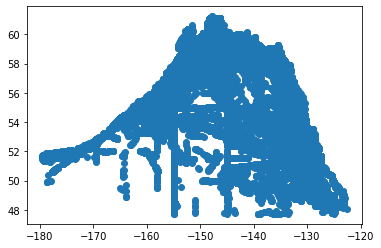

In [3]:
#just check lat/lon & see looks okay
minlat,maxlat=ds_bird.lat.min(),ds_bird.lat.max()
minlon,maxlon=ds_bird.lon.min(),ds_bird.lon.max()
plt.scatter(ds_bird.lon,ds_bird.lat)
print(minlat,maxlat,minlon,maxlon)

In [ ]:
#open aviso eddy dataset
ds = xr.open_dataset(filename_aviso).rename({'latitude':'lat','longitude':'lon'})
ds['lon'] = (ds.lon + 180) % 360 - 180
ds.close()
ds_eddy = ds
cond = (ds_eddy.lat>=minlat) & (ds_eddy.lat<=maxlat) & (ds_eddy.lon>=minlon) & (ds_eddy.lon<=maxlon)
ds_eddy = ds_eddy.where(cond,drop=True)
ilen_eddy = len(ds_eddy.lat)
print(ilen_eddy)
ds_eddy['time64'] = xr.DataArray(np.empty(ilen_eddy, dtype='datetime64[ns]'), coords={'obs': ds_eddy.obs}, dims=('obs'))
for i in range(ilen_eddy):
    ss = str(ds_eddy.time[i].dt.year.data)+'-'+str(ds_eddy.time[i].dt.month.data).zfill(2)+'-'+str(ds_eddy.time[i].dt.day.data).zfill(2)
    tem = np.datetime64(ss)
    ds_eddy['time64'][i]=tem
ds_eddy.to_netcdf('F:/data/project_data/NASA_biophysical/aviso/eddy_trajectory_19930101_20170106_northpac.nc')

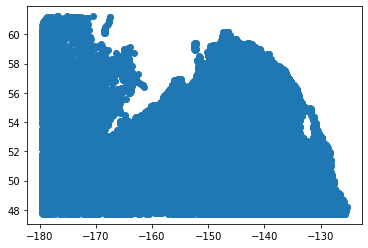

In [7]:
ds_eddy = xr.open_dataset('F:/data/project_data/NASA_biophysical/aviso/eddy_trajectory_19930101_20170106_northpac.nc')
ilen_eddy = len(ds_eddy.lat)
plt.scatter(ds_eddy.lon,ds_eddy.lat)

In [5]:
ds_eddy

<xarray.Dataset>
Dimensions:             (obs: 334732)
Coordinates:
  * obs                 (obs) int64 0 1 2 3 4 ... 334728 334729 334730 334731
Data variables:
    amplitude           (obs) float32 ...
    cyclonic_type       (obs) float64 ...
    lat                 (obs) float32 48.0161 47.9866 ... 47.7512 47.7305
    lon                 (obs) float32 -128.318 -128.357 ... -141.957 -141.965
    observation_number  (obs) float64 ...
    speed_average       (obs) float32 ...
    speed_radius        (obs) float32 ...
    time                (obs) object ...
    track               (obs) float64 ...
    time64              (obs) datetime64[ns] ...
Attributes:
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    title:                     Mesoscale Eddies in Altimeter Observations of SLA
    institution:               CNES/CLS in collaboration with Oregon State Un...
    project:                   SSALTO/DUACS
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains eddy atlas from two-sate...
    comment:                   Surface product; mesoscale eddies
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    date_created:              2017-09-22T10:20:17Z
    time_coverage_duration:    P8771D
    time_coverage_start:       1993-01-01T00:00:00Z
    time_coverage_end:         2017-01-06T00:00:00Z
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    product_version:           1.0

In [8]:
## print(len(cpr_sample_lat),ilen_cpr)
#print(len(lats_new),ilen_eddy)
save_eddy_index=[0] * (ilen_bird)
save_eddy_distance=[0] * (ilen_bird)

ilen_bird = len(ds_bird.lat)
ds_bird_save = ds_bird.copy(deep=True)
ilen_bird = len(ds_bird_save.lat)
for var in ds_eddy:
    if (var=='time'):
        continue
    if (var=='lat') or (var=='lon'):
        ds_bird_save[var+'_eddy']=xr.DataArray(np.empty(ilen_bird, dtype=str(ds_eddy[var].dtype)), coords={'index': ds_bird.index}, dims=('index'))
    else:
        ds_bird_save[var]=xr.DataArray(np.empty(ilen_bird, dtype=str(ds_eddy[var].dtype)), coords={'index': ds_bird.index}, dims=('index'))
ds_bird_save['save_eddy_distance']=xr.DataArray(np.empty(ilen_bird, dtype='float32'), coords={'index': ds_bird.index}, dims=('index'))

print(ilen_bird,ilen_eddy)
icnt=0
for index_bird in range(ilen_bird):
    if ds_bird.time[index_bird]<np.datetime64('1993-01-01'):
        continue
    arclen_to_eddy=100000  #set to a high value  
    iarg = np.argwhere(ds_eddy.time64.data==ds_bird.time[index_bird].data)
    if len(iarg)<1:
        continue
    for index_eddy in iarg:
        ieddy = int(index_eddy)
        coords_1 = (ds_bird.lat[index_bird], ds_bird.lon[index_bird])  #cpr sample location
        coords_2 = (ds_eddy.lat[ieddy], ds_eddy.lon[ieddy])  #eddy location
        arclen_temp = geodesic(coords_1, coords_2).km
        if arclen_temp<arclen_to_eddy:
            arclen_to_eddy=arclen_temp
            for var in ds_eddy:
                if (var=='time'):
                    continue
                if (var=='lat') or (var=='lon'):
                    ds_bird_save[var+'_eddy'][index_bird]=ds_eddy[var][ieddy]
                else:
                    ds_bird_save[var][index_bird]=ds_eddy[var][ieddy]
#                if var=='time':
#                    continue
#                ds_bird_save[var][index_bird]=ds_eddy[var][ieddy]
#            save_eddy_index[index_bird]=index_eddy
            ds_bird_save.save_eddy_distance[index_bird]=arclen_temp
            save_eddy_distance[index_bird]=arclen_temp
    if 20000*int(index_bird/20000)==index_bird:
        print(index_bird,ilen_bird)
ds_bird_save.to_netcdf(filename_bird_out_eddy_netcdf)

92738 334732
20000 92738


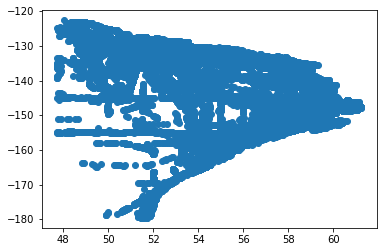

In [9]:
plt.scatter(ds_bird_save.lat,ds_bird_save.lon)

In [10]:
ds_bird_save

<xarray.Dataset>
Dimensions:                 (index: 92738)
Coordinates:
  * index                   (index) int64 0 1 2 3 4 ... 92734 92735 92736 92737
Data variables:
    Unnamed: 0              (index) int64 1 2 3 4 5 ... 92735 92736 92737 92738
    Master.Key              (index) object '00008900289266113069' ... 'WOL 20...
    Modified.Platform.Type  (index) object 'Large Boat' ... 'Large Boat'
    Fly.Bird.Method         (index) object 'Snapshot' 'Snapshot' ... 'Snapshot'
    Year                    (index) int64 1989 1989 1989 1989 ... 2018 2018 2018
    Month                   (index) int64 9 9 9 9 9 9 9 9 9 ... 7 7 7 7 7 7 7 7
    Day                     (index) int64 23 23 23 23 23 23 ... 17 17 17 17 17
    Julian.Date             (index) int64 266 266 266 266 ... 198 198 198 198
    Sample.Area             (index) float64 0.92 1.1 0.92 ... 0.57 0.59 0.57
    PI.Credit               (index) object 'Denny Zwiefelhofer' ... 'Kathy Ku...
    lon                     (index) float64 -151.5 -151.6 ... -150.7 -150.8
    lat                     (index) float64 59.55 59.54 59.53 ... 58.87 58.87
    ANMU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ARTE                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    BLKI                    (index) int64 1 2 0 1 1 1 7 7 5 ... 0 0 0 0 0 0 0 0
    BOGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CAAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CAGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    COLO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CRAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    DCCO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    FTSP                    (index) int64 2 2 1 0 2 1 0 0 ... 8 10 11 3 3 0 4 1
    GWGU                    (index) int64 2 0 0 0 0 0 1 0 1 ... 0 0 0 0 0 0 0 0
    HERG                    (index) int64 1 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    HOPU                    (index) int64 1 0 0 0 1 0 0 0 1 ... 0 0 0 0 0 0 0 0
    LEAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    LESP                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    MEGU                    (index) int64 1 0 0 0 1 0 0 0 0 ... 0 0 0 0 0 0 0 0
    NOFU                    (index) int64 0 0 0 0 0 0 0 0 14 ... 0 0 0 1 1 1 0 0
    PAAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    PALO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    PIGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    RHAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    SAGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    TUPU                    (index) int64 2 6 1 4 6 2 2 3 4 ... 0 0 4 1 0 0 0 0
    WHAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLSH                   (index) int64 0 0 0 0 0 0 1 3 0 ... 0 0 0 0 0 0 0 0
    ALLMU                   (index) int64 5 5 4 3 2 0 1 1 1 ... 0 0 0 0 0 0 0 0
    ALLBRMU                 (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    GACO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLALB                  (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLPE                   (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLJA                   (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    time                    (index) datetime64[ns] 1989-09-23 ... 2018-07-17
    amplitude               (index) float32 -1.1793424e-27 7.99e-43 ... 0.0 0.0
    cyclonic_type           (index) float64 1.211e-311 1.211e-311 ... 4.582e-319
    lat_eddy                (index) float32 -1.2799314e-27 ... 2.3694278e-38
    lon_eddy                (index) float32 -3.4479743e-30 ... 2.3509886e-38
    observatio

# Define function to read in data and put in a dictionary

In [ ]:
#define function to get all the data at once, use same years for climatology for all data
def get_data():
    
    #climatology years
    cyr1,cyr2='1993-01-01','2018-12-31'
    
    # CCMP test
    dir_pattern_zarr = 'F:/data/sat_data/ccmp/zarr/'
    ds= xr.open_zarr(dir_pattern_zarr)
    ds = ds.rename({'latitude':'lat','longitude':'lon'})
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds_ccmp = ds.sortby(ds.lon)
    ds_ccmp = ds_ccmp.drop('nobs')
    for var in ds_ccmp:
        tem = ds_ccmp[var].attrs
        tem['var_name']='ccmp_'+str(var)
        ds_ccmp[var].attrs=tem
    ds_ccmp_clim = ds_ccmp.sel(time=slice(cyr1,cyr2))
    ds_ccmp_clim = ds_ccmp_clim.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)
    
    # AVISO test
    dir_pattern_zarr = 'F:/data/sat_data/aviso/zarr/'
    ds= xr.open_zarr(dir_pattern_zarr)
    ds = ds.rename({'latitude':'lat','longitude':'lon'})
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds_aviso = ds.sortby(ds.lon).drop({'lat_bnds','lon_bnds','crs','err'})
    for var in ds_aviso:
        tem = ds_aviso[var].attrs
        tem['var_name']='aviso_'+str(var)
        ds_aviso[var].attrs=tem
    ds_aviso_clim = ds_aviso.sel(time=slice(cyr1,cyr2))
    ds_aviso_clim = ds_aviso_clim.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)    

    #sst
    dir_pattern_zarr = 'F:/data/sat_data/sst/cmc/zarr/'
    ds_sst= xr.open_zarr(dir_pattern_zarr)
    ds_sst = ds_sst.drop({'analysis_error','mask','sea_ice_fraction'})
    tem = ds_sst.analysed_sst.attrs
    tem['var_name']='cmc_sst'
    ds_sst.analysed_sst.attrs=tem
    ds_sst_clim = ds_sst.sel(time=slice(cyr1,cyr2))
    ds_sst_clim = ds_sst_clim.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)
    
    #get bathymetry from ETOPO1
    fname_topo = 'F:/data/topo/ETOPO1_Ice_g_gmt4.grd'
    ds = xr.open_dataset(fname_topo)
    ds_topo = ds.rename_dims({'x':'lon','y':'lat'}).rename({'x':'lon','y':'lat'})
    tem = ds_topo.z.attrs
    tem['var_name']='etopo_depth'
    ds_topo.z.attrs=tem

    #put data into a dictionary
    data_dict={'aviso':ds_aviso,
               'wnd':ds_ccmp,
               'sst':ds_sst,
              'topo':ds_topo}
    clim_dict={'aviso_clim':ds_aviso_clim,
               'wnd_clim':ds_ccmp_clim,
               'sst_clim':ds_sst_clim}
  
    return data_dict,clim_dict

In [ ]:
data,clim = get_data()

# Collocate all data with bird data

In [ ]:
#output files
ds_bird = xr.open_dataset(filename_bird_out_eddy_netcdf)
for name in data:
    ds_data=data[name]
    if name=='topo':
        continue
    print('name',name)   
    for var in ds_data:
        var_tem=ds_data[var].attrs['var_name']
        ds_bird[var_tem]=xr.DataArray(np.empty(ilen_bird, dtype=str(ds_data[var].dtype)), coords={'index': ds_bird.index}, dims=('index'))
        ds_bird[var_tem].attrs=ds_data[var].attrs
    print('var',var_tem)
    for i in range(80000,80100):
#    for i in range(len(ds_bird.lat)):
        if ds_bird.time[i]<ds_data.time.min():
            continue
        if ds_bird.time[i]>ds_data.time.max():
            continue
        t1,t2 = ds_bird.time[i]-np.timedelta64(24,'h'), ds_bird.time[i]+np.timedelta64(24,'h')
        lat1,lat2=ds_bird.lat[i]-.5,ds_bird.lat[i]+.5
        lon1,lon2=ds_bird.lon[i]-.5,ds_bird.lon[i]+.5
        tem = ds_data.sel(time=slice(t1,t2),lat=slice(lat1,lat2),lon=slice(lon1,lon2)).load()
        tem = tem.interp(time=ds_bird.time[i],lat=ds_bird.lat[i],lon=ds_bird.lon[i])
        #tem = tem.load()
        for var in ds_data:
            var_tem=ds_data[var].attrs['var_name']
            ds_bird[var_tem][i]=tem[var].data
        if int(i/10000)*10000==i:
            print(i,len(ds_bird.lat))
#at topo info
#interp will create a new 2D array, to avoid that put the lat/lon into dataarrays
ds_topo=data['topo']
new_lat = xr.DataArray(ds_bird.lat.data, dims='z')
new_lon = xr.DataArray(ds_bird.lon.data, dims='z')
tem = ds_topo.z.interp(lat=new_lat, lon=new_lon,method='nearest')
ds_bird['ETOPO_depth'] = xr.DataArray(tem.data, coords={'index': ds_bird.index}, dims=('index'))
ds_bird = ds_bird.drop('obs')

#output data
df_bird = ds_bird.to_dataframe()
df_bird.to_csv(filename_bird_out)
ds_bird.to_netcdf(filename_bird_out_netcdf)

# bring data together

In [ ]:
plt.plot(ds_bird.amplitude)

In [21]:
adir = 'F:/data/project_data/NASA_biophysical/collocated_data/'
file1 = adir+'NPPSD_GOA_allseabird_wide_sat_and_eddy_data.ncaviso.nc'
file2 = adir+'NPPSD_GOA_allseabird_wide_sat_and_eddy_data.ncwnd.nc'
file3 = adir+'NPPSD_GOA_allseabird_wide_sat_and_eddy_data.ncsst.nc'

ds = xr.open_dataset(file1)
ds2 = xr.open_dataset(file2)
for var in ds2:
    if not var in ds:
        ds[var]=ds2[var]
ds2 = xr.open_dataset(file3)
for var in ds2:
    if not var in ds:
        ds[var]=ds2[var]
ds.to_netcdf(adir+'NPPSD_GOA_allseabird_wide_sat_and_eddy_data_final.nc')
df_bird = ds.to_dataframe()
df_bird.to_csv(adir+'NPPSD_GOA_allseabird_wide_sat_and_eddy_data_final.csv')



In [22]:
ds

<xarray.Dataset>
Dimensions:                 (index: 92738)
Coordinates:
  * index                   (index) int64 0 1 2 3 4 ... 92734 92735 92736 92737
Data variables:
    Unnamed: 0              (index) int64 1 2 3 4 5 ... 92735 92736 92737 92738
    Master.Key              (index) object '00008900289266113069' ... 'WOL 20...
    Modified.Platform.Type  (index) object 'Large Boat' ... 'Large Boat'
    Fly.Bird.Method         (index) object 'Snapshot' 'Snapshot' ... 'Snapshot'
    Year                    (index) int64 1989 1989 1989 1989 ... 2018 2018 2018
    Month                   (index) int64 9 9 9 9 9 9 9 9 9 ... 7 7 7 7 7 7 7 7
    Day                     (index) int64 23 23 23 23 23 23 ... 17 17 17 17 17
    Julian.Date             (index) int64 266 266 266 266 ... 198 198 198 198
    Sample.Area             (index) float64 0.92 1.1 0.92 ... 0.57 0.59 0.57
    PI.Credit               (index) object 'Denny Zwiefelhofer' ... 'Kathy Ku...
    lon                     (index) float64 -151.5 -151.6 ... -150.7 -150.8
    lat                     (index) float64 59.55 59.54 59.53 ... 58.87 58.87
    ANMU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ARTE                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    BLKI                    (index) int64 1 2 0 1 1 1 7 7 5 ... 0 0 0 0 0 0 0 0
    BOGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CAAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CAGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    COLO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    CRAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    DCCO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    FTSP                    (index) int64 2 2 1 0 2 1 0 0 ... 8 10 11 3 3 0 4 1
    GWGU                    (index) int64 2 0 0 0 0 0 1 0 1 ... 0 0 0 0 0 0 0 0
    HERG                    (index) int64 1 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    HOPU                    (index) int64 1 0 0 0 1 0 0 0 1 ... 0 0 0 0 0 0 0 0
    LEAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    LESP                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    MEGU                    (index) int64 1 0 0 0 1 0 0 0 0 ... 0 0 0 0 0 0 0 0
    NOFU                    (index) int64 0 0 0 0 0 0 0 0 14 ... 0 0 0 1 1 1 0 0
    PAAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    PALO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    PIGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    RHAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    SAGU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    TUPU                    (index) int64 2 6 1 4 6 2 2 3 4 ... 0 0 4 1 0 0 0 0
    WHAU                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLSH                   (index) int64 0 0 0 0 0 0 1 3 0 ... 0 0 0 0 0 0 0 0
    ALLMU                   (index) int64 5 5 4 3 2 0 1 1 1 ... 0 0 0 0 0 0 0 0
    ALLBRMU                 (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    GACO                    (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLALB                  (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLPE                   (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    ALLJA                   (index) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    time                    (index) datetime64[ns] 1989-09-23 ... 2018-07-17
    amplitude               (index) float32 -1.1793424e-27 7.99e-43 ... 0.0 0.0
    cyclonic_type           (index) float64 1.211e-311 1.211e-311 ... 4.582e-319
    lat_eddy                (index) float32 -1.2799314e-27 ... 2.3694278e-38
    lon_eddy                (index) float32 -3.4479743e-30 ... 2.3509886e-38
    observatio

In [26]:
ds2 = ds.where(ds.lon_eddy<-100)

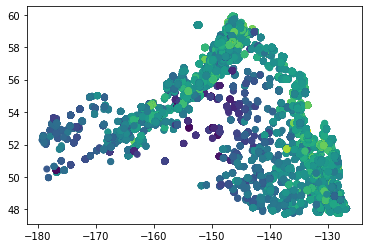

In [28]:
plt.scatter(ds2.lon_eddy,ds2.lat_eddy,c=ds2.aviso_adt)

In [ ]:
ds_bird2 = xr.open_dataset(filename_bird_out_eddy_netcdf)
ds_bird2

# now add clim data

In [ ]:
#read in csv file in to panda dataframe
ds_bird = pd.read_csv(filename_bird_out)
#calculate time
tem=np.ones(len(ds_bird),dtype='datetime64[ns]')
for i in range(len(ds_bird)):
    tstr = str(ds_bird.Year[i])+'-'+str(ds_bird.Month[i]).zfill(2)+'-'+str(ds_bird.Day[i]).zfill(2)
    tem[i]=np.datetime64(tstr)
ds_bird['time']=tem
ds_bird

In [ ]:
for name in clim:
    ds_data=clim[name]
    print('name',name)
    for var in ds_data:
        var_tem=ds_data[var].attrs['var_name']+'_clim'
        ds_bird[var_tem]=np.ones(len(ds_bird))*np.NaN
        ds_bird[var_tem].attrs=ds_data[var].attrs
    print('var',var_tem)
    for i in range(len(ds_bird)):
        t1,t2 = ds_bird.time[i]-np.timedelta64(24,'h'), ds_bird.time[i]+np.timedelta64(24,'h')
        lat1,lat2=ds_bird.Lat[i]-.5,ds_bird.Lat[i]+.5
        lon1,lon2=ds_bird.Lon[i]-.5,ds_bird.Lon[i]+.5
        tem = ds_data.sel(dayofyear=ds_bird.time[i].dayofyear,lat=slice(lat1,lat2),lon=slice(lon1,lon2)).load()
        tem = tem.interp(lat=ds_bird.Lat[i],lon=ds_bird.Lon[i])
        for var in ds_data:
            var_tem=ds_data[var].attrs['var_name']+'_clim'
            ds_bird[var_tem][i]=tem[var].data
            
#output data
ds_bird.to_csv(filename_bird_out_final)
DS_bird = xr.Dataset.from_dataframe(ds_bird)
DS_bird.to_netcdf(filename_bird_out_netcdf_final)


